<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [62]:
# type your code here
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df = pd.read_csv('diamond_data.csv')
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

In [8]:
df.isnull().sum()

carat    0
cut      0
color    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1547 non-null   float64
 1   cut     1547 non-null   object 
 2   color   1547 non-null   object 
 3   depth   1547 non-null   float64
 4   table   1547 non-null   float64
 5   price   1547 non-null   int64  
 6   x       1547 non-null   float64
 7   y       1547 non-null   float64
 8   z       1547 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 108.9+ KB


In [10]:
df['cut'].value_counts()

Ideal        611
Premium      389
Very Good    358
Good         148
Fair          41
Name: cut, dtype: int64

In [11]:
df['color'].value_counts()

G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64

In [12]:
num_data = df.select_dtypes(include = np.number)
cat_data = df.select_dtypes(exclude = np.number)

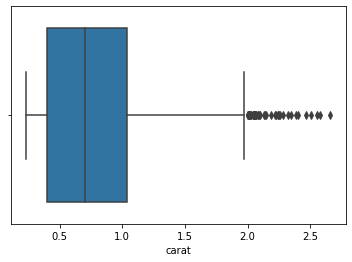

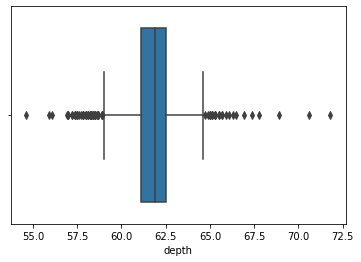

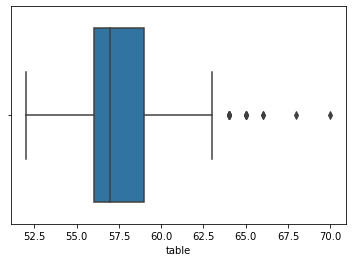

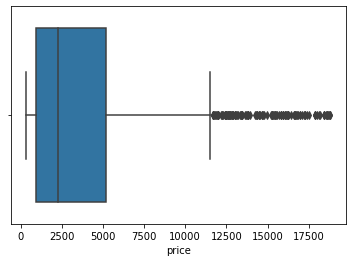

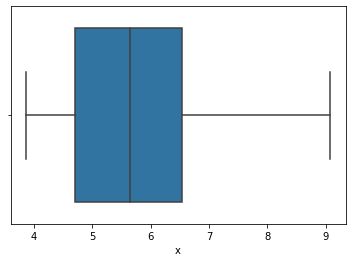

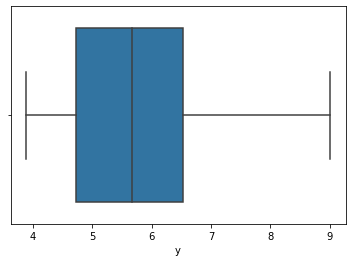

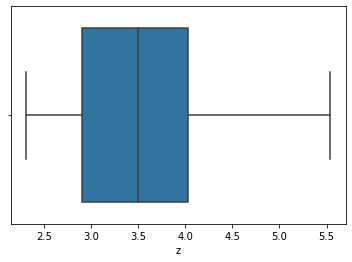

In [14]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

<ipython-input-15-0aaae5d69a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-15-0aaae5d69a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


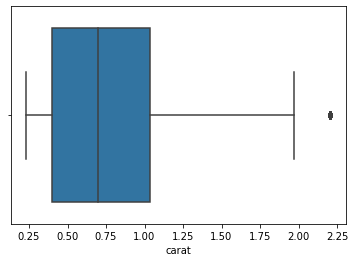

<ipython-input-15-0aaae5d69a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-15-0aaae5d69a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


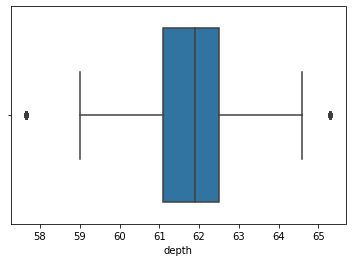

<ipython-input-15-0aaae5d69a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-15-0aaae5d69a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


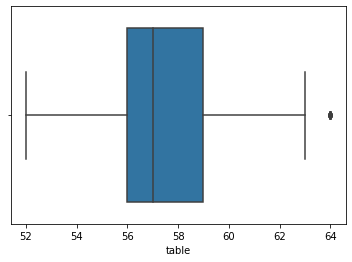

<ipython-input-15-0aaae5d69a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-15-0aaae5d69a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


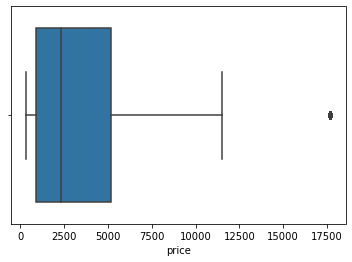

<ipython-input-15-0aaae5d69a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-15-0aaae5d69a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


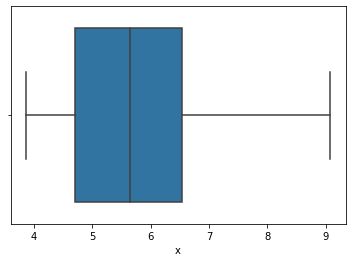

<ipython-input-15-0aaae5d69a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-15-0aaae5d69a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


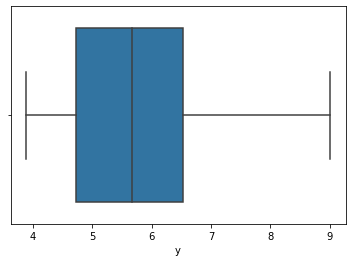

<ipython-input-15-0aaae5d69a49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-15-0aaae5d69a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


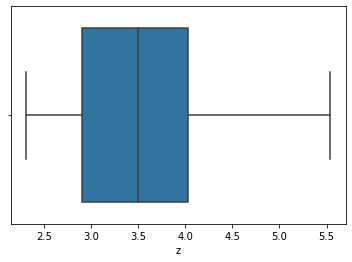

In [15]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
    num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))
    sns.boxplot(num_data[i])
    plt.show()

In [17]:
cat_data = pd.get_dummies(cat_data,drop_first=True)

In [18]:
df = pd.concat((num_data,cat_data),axis = 1)
df

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,61.1,61.0,682.00,4.29,4.32,2.63,1,0,0,0,0,1,0,0,0,0
1,0.72,62.0,56.0,2443.00,5.80,5.74,3.58,0,1,0,0,0,0,0,1,0,0
2,1.71,62.9,58.0,8848.00,7.64,7.58,4.79,0,0,1,0,0,0,0,0,0,1
3,1.01,59.2,59.0,7287.00,6.67,6.60,3.93,0,0,1,0,1,0,0,0,0,0
4,0.52,62.7,56.0,1720.00,5.17,5.14,3.23,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1.05,64.2,61.0,4878.00,6.33,6.41,4.09,1,0,0,0,1,0,0,0,0,0
1543,0.40,62.1,53.0,573.00,4.75,4.78,2.96,0,1,0,0,0,0,1,0,0,0
1544,0.50,62.5,57.0,1082.00,5.06,5.09,3.17,0,1,0,0,0,0,0,0,0,1
1545,1.50,63.8,57.0,17687.08,7.17,7.21,4.59,0,0,0,1,0,0,0,1,0,0


In [20]:
sc = StandardScaler()
data_sc = sc.fit_transform(df)
data_sc = pd.DataFrame(data_sc,columns=df.columns)
data_sc

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.021107,-0.454574,1.629463,-0.740856,-1.263882,-1.249387,-1.296248,3.074525,-0.807947,-0.579590,-0.548720,-0.471125,2.155455,-0.507665,-0.432736,-0.316677,-0.239617
1,-0.154507,0.188601,-0.654555,-0.366332,0.076712,0.022883,0.074751,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,-0.507665,2.310879,-0.316677,-0.239617
2,1.888192,0.831776,0.259052,0.995863,1.710284,1.671457,1.820972,-0.325254,-0.807947,1.725359,-0.548720,-0.471125,-0.463939,-0.507665,-0.432736,-0.316677,4.173328
3,0.443859,-1.812387,0.715856,0.663874,0.849107,0.793412,0.579856,-0.325254,-0.807947,1.725359,-0.548720,2.122578,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
4,-0.567174,0.688848,-0.654555,-0.520098,-0.482609,-0.514696,-0.430354,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,0.526393,1.760806,1.629463,0.151536,0.547252,0.623179,0.810762,3.074525,-0.807947,-0.579590,-0.548720,2.122578,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
1543,-0.814774,0.260065,-2.024966,-0.764038,-0.855489,-0.837243,-0.820006,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,1.969804,-0.432736,-0.316677,-0.239617
1544,-0.608440,0.545920,-0.197751,-0.655786,-0.580268,-0.559494,-0.516943,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,-0.507665,-0.432736,-0.316677,4.173328
1545,1.454892,1.474950,-0.197751,2.875730,1.293013,1.339951,1.532340,-0.325254,-0.807947,-0.579590,1.822424,-0.471125,-0.463939,-0.507665,2.310879,-0.316677,-0.239617


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
df['y'].skew()

0.4383878452014628

In [7]:
data = df.copy()
data['y'],lam = stats.boxcox(df['y'])
data['y'].skew()

0.033020411524122724

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
inp = data_sc.drop('price',1)
out = data_sc['price']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     641.9
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:33:27   Log-Likelihood:                -614.90
No. Observations:                1547   AIC:                             1264.
Df Residuals:                    1530   BIC:                             1355.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           8.89e-18      0.009   9.66e-16      1.000      -0.018       0.018
carat             1.5535      0.043     36.533      0.000       1.470       1.637
depth             0.0261      0.039      0.668      0.504      -0.051       0.103
table            -0.0266      0.012     -2.155      0.031      -0.051      -0.002
x                -0.7480      0.268     -2.794      0.005      -1.273      -0.223
y                 0.5458      0.253      2.159      0.031       0.050       1.042
z                -0.4064      0.309     -1.314      0.189      -1.013       0.200
cut_Good          0.0490      0.020      2.490      0.013       0.010       0.088
cut_Ideal         0.1611      0.032      4.997      0.000       0.098       0.224
cut_Premium       0.1213      0.027      4.427      0.000       0.068       0.175
cut_Very Good     0.1155      0.027      4.225      0.000       0.062       0.169
color_E          -0.0031      0.013     -0.239      0.811      -0.028       0.022
color_F           0.0203      0.013      1.590      0.112      -0.005       0.045
color_G          -0.0066      0.013     -0.504      0.614      -0.032       0.019
color_H          -0.0541      0.013     -4.298      0.000      -0.079      -0.029
color_I          -0.0724      0.012     -6.271      0.000      -0.095      -0.050
color_J          -0.0986      0.011     -9.045      0.000      -0.120      -0.077
==============================================================================
Omnibus:                      732.501   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7291.698
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      12.885   Cond. No.                         84.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the Durbin-Watson Test value (1.934) is in range of 1.5 - 2.5 so there is no auto collinearity present in the data.

In [26]:
ols_mod.resid.skew()

1.9649093359338539

In [28]:
box_out,lam = stats.boxcox(df['price'])
box_out

array([4.40761031, 4.91360268, 5.34605109, ..., 4.60034129, 5.55067043,
       4.53436813])

In [29]:
inp = data_sc.drop('price',1)
inpc = sm.add_constant(inp)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1834.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:47:21   Log-Likelihood:                 1617.4
No. Observations:                1547   AIC:                            -3201.
Df Residuals:                    1530   BIC:                            -3110.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8815      0.002   2244.835      0.000       4.877       4.886
carat            -0.1722      0.010    -17.139      0.000      -0.192      -0.152
depth            -0.0107      0.009     -1.161      0.246      -0.029       0.007
table             0.0054      0.003      1.864      0.063      -0.000       0.011
x                 0.1272      0.063      2.012      0.044       0.003       0.251
y                 0.0718      0.060      1.203      0.229      -0.045       0.189
z                 0.3500      0.073      4.789      0.000       0.207       0.493
cut_Good          0.0055      0.005      1.187      0.236      -0.004       0.015
cut_Ideal         0.0311      0.008      4.087      0.000       0.016       0.046
cut_Premium       0.0158      0.006      2.440      0.015       0.003       0.029
cut_Very Good     0.0169      0.006      2.616      0.009       0.004       0.030
color_E          -0.0013      0.003     -0.414      0.679      -0.007       0.005
color_F           0.0016      0.003      0.515      0.607      -0.004       0.007
color_G          -0.0010      0.003     -0.323      0.747      -0.007       0.005
color_H          -0.0233      0.003     -7.838      0.000      -0.029      -0.017
color_I          -0.0307      0.003    -11.252      0.000      -0.036      -0.025
color_J          -0.0335      0.003    -13.021      0.000      -0.039      -0.028
==============================================================================
Omnibus:                       35.334   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.896
Skew:                          -0.200   Prob(JB):                     4.42e-13
Kurtosis:                       3.850   Cond. No.                         84.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
ols_mod.resid.skew()

-0.19980002819632275

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here
lr = LinearRegression()
forward = sfs(estimator = lr, k_features = 'best', forward=True, scoring = 'neg_mean_squared_error')
sfs_forward = forward.fit(inp,box_out)

In [41]:
feat_forward = sfs_forward.k_feature_names_
feat_forward

('carat',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_H',
 'color_I',
 'color_J')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here
lr = LinearRegression()
mse = abs(cross_val_score(lr,inp,box_out,cv = 4, scoring='neg_mean_squared_error'))
be = np.mean(mse)
ve = np.std(mse)
cva = ve/be
cva

0.08600014348402624

Valid Model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# type your code here
inp = num_data.drop('price',1)
inpc = sm.add_constant(inp)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3798.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:11:25   Log-Likelihood:                 1428.0
No. Observations:                1547   AIC:                            -2842.
Df Residuals:                    1540   BIC:                            -2805.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2890      0.467      7.042      0.000       2.373       4.205
carat         -0.4109      0.023    -17.800      0.000      -0.456      -0.366
depth         -0.0132      0.007     -1.806      0.071      -0.028       0.001
table         -0.0023      0.001     -1.907      0.057      -0.005    6.54e-05
x              0.1237      0.059      2.081      0.038       0.007       0.240
y              0.0674      0.055      1.220      0.223      -0.041       0.176
z              0.5034      0.117      4.300      0.000       0.274       0.733
==============================================================================
Omnibus:                        5.888   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                7.177
Skew:                          -0.024   Prob(JB):                       0.0276
Kurtosis:                       3.330   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
ols_mod.pvalues.idxmax()

'y'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# type your code here
inp = data_sc.drop('price',1)
out = df['price']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()
ols_mod.resid.skew(),ols_mod.resid.kurt() 

(1.9649093359338075, 9.920703690158295)

Yes residuals do not follow normal distribution

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
box_out,lam = stats.boxcox(df['price'])
inp = data_sc.drop('price',1)
inpc = sm.add_constant(inp)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()
ols_mod.resid.skew(),ols_mod.resid.kurt() 

(-0.19980002819632275, 0.8571190630125862)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
lr = LinearRegression()
backward = sfs(lr , k_features=7, forward = False , scoring = 'neg_mean_squared_error')
sfs_backward = backward.fit(inp,box_out)

In [56]:
feat_back = sfs_backward.k_feature_names_
feat_back

('carat', 'depth', 'z', 'cut_Ideal', 'color_H', 'color_I', 'color_J')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
# type your code here
inp = data_sc[['color_E','color_F','color_G','color_H','color_I','color_J']]
inpc = sm.add_constant(inp)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.525
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           0.000148
Time:                        03:10:05   Log-Likelihood:                -693.22
No. Observations:                1547   AIC:                             1400.
Df Residuals:                    1540   BIC:                             1438.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8815      0.010    505.754      0.000       4.863       4.900
color_E       -0.0188      0.013     -1.398      0.162      -0.045       0.008
color_F       -0.0020      0.013     -0.152      0.879      -0.028       0.024
color_G        0.0097      0.014      0.707      0.480      -0.017       0.037
color_H        0.0294      0.013      2.248      0.025       0.004       0.055
color_I        0.0250      0.012      2.091      0.037       0.002       0.048
color_J        0.0267      0.011      2.395      0.017       0.005       0.049
==============================================================================
Omnibus:                      326.793   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.575
Skew:                          -0.003   Prob(JB):                     1.57e-14
Kurtosis:                       2.007   Cond. No.                         2.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
ols_mod.pvalues.idxmax()

'color_F'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here
lr = LinearRegression()
inp = data_sc.drop('price',1)
rfe = RFECV(estimator = lr)
rfe_mod = rfe.fit(inp,box_out)

In [64]:
rfe_mod.ranking_

array([1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 5, 4, 6, 1, 1, 1])

In [67]:
scorecard = pd.DataFrame()
scorecard['Features'] = inp.columns
scorecard['RFE'] = rfe_mod.ranking_
scorecard = scorecard[scorecard['RFE']==1]
scorecard.head()['Features']

0    carat
1    depth
3        x
4        y
5        z
Name: Features, dtype: object